# INTRODUCTION


Rossmann is a well-known European(Rossmann Store Sales, 2015) drugstore chain that has been in operation since 1972. With over 3,000 stores in 7 countries, Rossmann is a go-to destination for a wide range of personal care, wellness, and household products. The company has earned a reputation for its commitment to sustainability, with a range of initiatives designed to reduce waste and promote sustainable products. In addition to its brick-and-mortar stores, Rossmann also operates an online store, making it easy for customers to shop for their favorite products from the comfort of their own homes. With its wide selection of high-quality products and commitment to sustainability, Rossmann is a leader in the European retail industry.

# Variable Explanation
Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



# import and reading the Data
We will Beging with importing the required libraries and reading csv files

In [191]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [192]:
sales_data = pd.read_csv('train.csv', low_memory=False)

In [193]:

stores_lookup = pd.read_csv('store.csv')

In [194]:
df_test = pd.read_csv('test.csv')
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


# DATA SUMMARY

The stores_lookup table has 10 columns and 1,115 rows. It has a primary key Store that has a unique integer for each of the 1,115 stores. It gives us static information about each store such as the model and assortment of the store, information about the nearest competitor store, and whether or not they participate in the consecutive promotion "Promo2". Largely we're looking at numerical and date data, but Store Type and Assortment are flagged with letters to indicate store models and assorment level, per the variable explanations, as well as the PromoInterval column listing abbreviated months.

In [195]:
stores_lookup.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [196]:
#table has 10 columns and 1,115 rows.
stores_lookup.shape

(1115, 10)

In [197]:
stores_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


The sales_data table has 9 columns and 1,017,209 rows. Rather than have a unique primary key, it lists number of sales and customers for each store for each day from Jan 01, 2013 through July 31, 2015. It almost entirely numerical or date data, including the use of binary flags to indicate if the store was open, running a promo, and if it was a school holiday. The StateHoliday column is an exception in that it uses a binary flag 0 if there was no state holiday, but a letter 'a'-'c' to list the type of holiday if there was one.

In [198]:

sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [199]:
sales_data.shape

(1017209, 9)

In [200]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [201]:
print(sales_data["Date"].min())
print(sales_data["Date"].max())

2013-01-01
2015-07-31


In [222]:
sales_data["Year"] = sales_data["Date"].dt.year
sales_data["Month"] = sales_data["Date"].dt.month
sales_data["DayOfMonth"] = sales_data["Date"].dt.day

In [223]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 93.1+ MB


# Merging OF DATA Source
Next we will merge both tables into one so we can more easily work with them. We will join the tables based on the shared Store column, which is a foreign key in the sales_data table and a primary key in the stores_lookup table, so we'll validate the merge based on this many-to-one relationship.



In [224]:
#Merging OF DATA Sources
#We will join the tables based on the shared Store. column,which is a foregin key in the sales_data table and a primary key in the stores_lookup table,so we will validate the merge based on this many to-one relationship

merged_sales = sales_data.merge(stores_lookup, how='left', on="Store") #(validate="many_to_one")

In [225]:
merged_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [226]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  DayOfMonth                 1017209 no

# Summary Statistics

the summary statistics for our table.

In [227]:
import seaborn as sns
merged_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayOfMonth,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [228]:
#Now we will take a closer look at our statistics for our Sales column.

print("skew     " + str(round(merged_sales['Sales'].skew(),6)))

print(merged_sales['Sales'].describe().round(3))
print("mode     " + str(merged_sales['Sales'].mode()))


skew     0.64146
count    1017209.000
mean        5773.819
std         3849.926
min            0.000
25%         3727.000
50%         5744.000
75%         7856.000
max        41551.000
Name: Sales, dtype: float64
mode     0    0
Name: Sales, dtype: int64


We can see our sales figures have a slightly positive skew, with the mean (5773.819) only slightly larger than the median (5744.000), suggesting most outliers are to the right of the mean.
Considering our min and max values of 0 and 41,551 sales, we aren't surprised to see there may be some extreme outliers.

The max value well above the mean of 5,773.819 and outside the standard deviation of 3849.926 helps us see how our mean ends up getting pulled slightly to the right for our positive skew.

There is no mode as we don't have any stores recording the exact same number of sales on any days, which isn't surprising.

# DATA Cleaning


<h1><center>1.DateTime</center></h1>
First we'll convert our Date column to datetime for easier filtering later on.

With an .info() call we can confirm our Date column was successfully converted to datetime.

We'll also expand our Date column into separate Month, Day of Month, and Year columns for easier filtering.

In [229]:

sales_data['Date'] = pd.to_datetime(sales_data['Date'], format="%Y-%m-%d", errors='raise')

In [230]:
sales_data["Year"] = sales_data["Date"].dt.year
sales_data["Month"] = sales_data["Date"].dt.month
sales_data["DayOfMonth"] = sales_data["Date"].dt.day

In [231]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 93.1+ MB


In [232]:
print("Rows before dropping duplicates: " + str(merged_sales.shape[0]))
merged_sales = merged_sales.drop_duplicates()
print("Rows after dropping duplicates: " + str(merged_sales.shape[0]))

Rows before dropping duplicates: 1017209
Rows after dropping duplicates: 1017209


The length of our table remains the same, looks like no duplicate rows were found!


<h1><center>2.Text and Expected Values></center></h1>
Next we'll check our four columns that contain strings to make sure we have no inappropriately entered data. Using str.strip() to remove any accidental leading or trailing spaces.

In [233]:
check_cols = [ 'Open', 'Promo', 'Promo2', 'SchoolHoliday',  'DayOfWeek', 'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

for col in check_cols:
    print(col)
    print(sorted(merged_sales[col].unique()))

Open
[0, 1]
Promo
[0, 1]
Promo2
[0, 1]
SchoolHoliday
[0, 1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[nan, 1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0]
Promo2SinceYear
[nan, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


We see the relevant binary flags, day of weeks, week, month, and year numeric values we expect.

Because the CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear columns are only using whole numbers and they are a discrete value, we will change them from floats to integers.


<h1><center>3.RemovinG Rows and Columns></center></h1>
Below I look at entries for stores on days they were closed.

For the purposes of our analysis I've chosen to drop these rows, as no sales are recorded on days stores are closed. The zero sales recorded for each of these rows lowers the average sales, and we can see this by comparing the mean Sales for all entries in our table to the mean Sales of only days that stores were open. If we filter for entries of stores that are closed we'll see a return of 172,817 rows, all of which record the expected 0 sales, lowering our mean Sales statistic.

The potential information lost here is if we want to compare stores based on the number of days they are open or closed, but that is beyond the scope of our analysis for now. To avoid losing this information we will make a copy of our dataframe with only the days stores are open, to further be referred to as sales, rather than altering merged_sales in case we wish to access this data at a later time.

In [234]:
## mean sales including entries for days stores are closed
merged_sales['Sales'].mean()

5773.818972305593

In [235]:
## mean sales for only days stores are open
merged_sales.loc[merged_sales['Open'] == 1, 'Sales'].mean()

6955.514290755952

In [236]:
## confirming all entries where the store is  marked as closed have 0 sales
merged_sales.loc[merged_sales["Open"] == 0, ['Sales', 'Customers']].value_counts()

Sales  Customers
0      0            172817
dtype: int64

Now as we chose to delete any rows for days a store wasn't open, our Open column should only contain the value 1 now and is redundant, so we'll remove that.

In [237]:
## creating new sales dataframe with only entries for days stores are open
sales = merged_sales.drop(index=(merged_sales[merged_sales["Open"] == 0]).index, axis=1)

In [238]:
sales['Open'].value_counts()

1    844392
Name: Open, dtype: int64

In [239]:
sales.drop(columns=["Open"], inplace=True)


<h1><center>4.OutLiers </center></h1>

  we'll take a look at any outliers we may need to treat.

Sales                     AxesSubplot(0.125,0.53;0.352273x0.35)
Customers              AxesSubplot(0.547727,0.53;0.352273x0.35)
CompetitionDistance       AxesSubplot(0.125,0.11;0.352273x0.35)
dtype: object

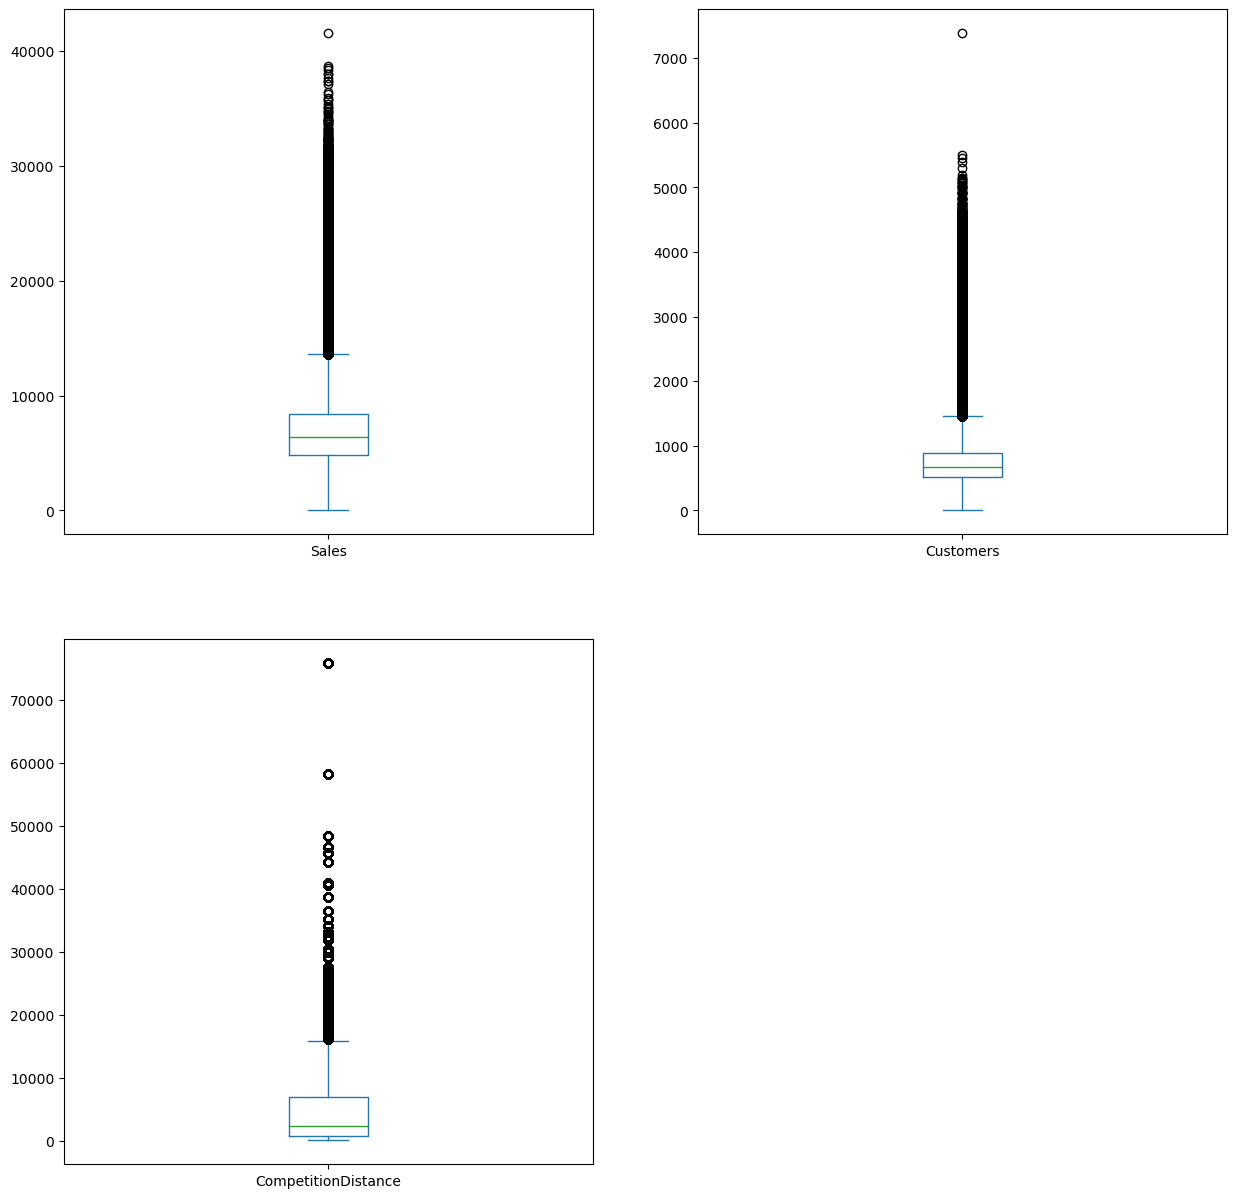

In [240]:
sales.plot(y=['Sales', 'Customers', 'CompetitionDistance'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))

<h1><center>SALES OUTLIERS</center></h1>

In [241]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

In [242]:
col = 'Sales'
lower_sales, upper_sales, percent_outliers_sales = calculate_outlier(sales, col)

print("lower band = " + str(lower_sales))
print("upper band = " + str(upper_sales))
print("percentage of sales that are outliers = " + str(percent_outliers_sales) + "%")


lower band = -392.5
upper band = 13611.5
percentage of sales that are outliers = 3.64%


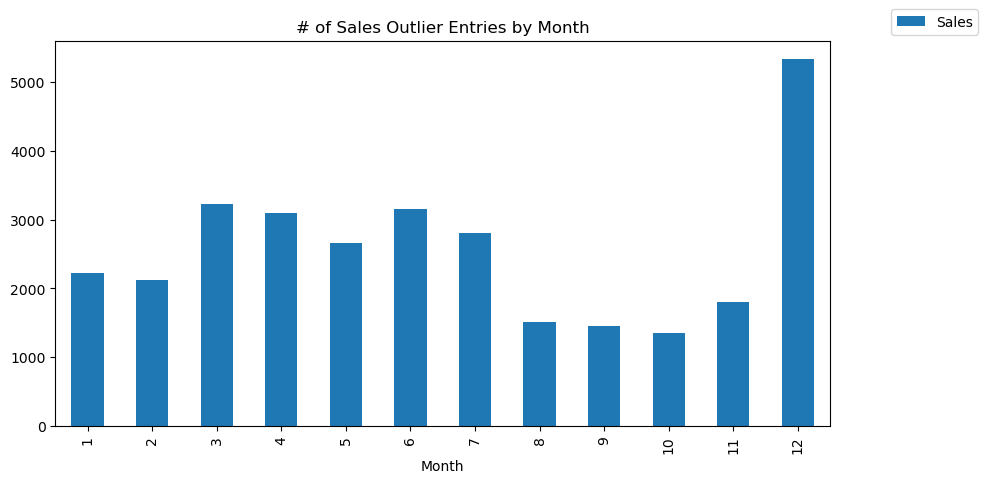

In [243]:
sales_outliers_by_month = pd.pivot_table((sales.loc[sales[col] > upper_sales]), index='Month', values='Sales', aggfunc='count')

sales_outliers_by_month.plot(y='Sales', kind='bar', figsize=(10,5), title="# of Sales Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

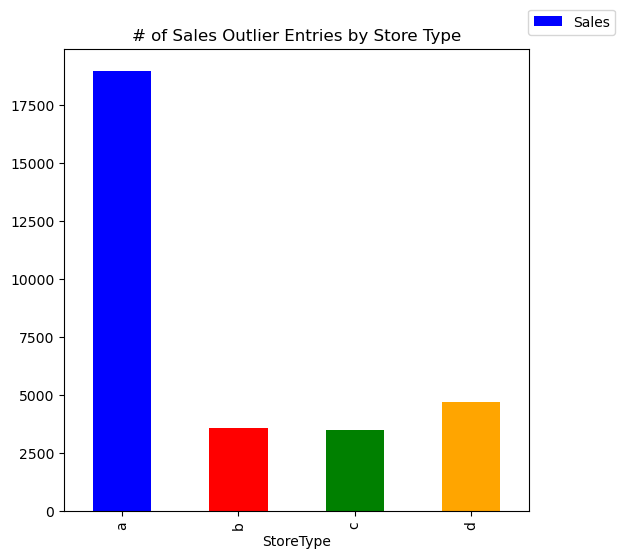

In [244]:
sales_outliers_by_stype = pd.pivot_table((sales.loc[sales[col] > upper_sales]), index='StoreType', values='Sales', aggfunc='count')

sales_outliers_by_stype.plot(y='Sales', kind='bar', figsize=(6,6), 
                             title="# of Sales Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

When we look at the Sales outliers by month, we see the most represented month is December at 17.33%, which is unsurprising given the Christmas holidays. However, when we look at the outliers by Store Type we see that the 61.71% majority are coming from Type A stores, while Type B, C, D are more equally represented at 11-15%. This suggests that Type A stores may be the best performers in regards to outstanding sales days, and is worth looking into further.

Below we will treat our Sales outliers by imputing them with our upper range value we calculated earlier, 13611.5, rounded up to 13612 as our Sales column is a measure of discrete values using whole numbers. As these outliers represent exceptionally high sales day, they are intended to be high numbers, but we would like to treat the outliers to limit their influence on any future modelling. As such imputing with our upper range value feels more appropriate than using our mean Sales value.

We also save this a new dataframe going forward, to further be referenced to as sales_treated, so that we can preserve our sales dataframe with the outliers intact, should we wish to investigate them further

In [245]:
sales_treated = sales.copy()

<h1><center>CUSTOMER OUTLIERS </center></h1>

In [246]:
col = 'Customers'
lower_cust, upper_cust, percent_outliers_cust = calculate_outlier(sales_treated, col)

print(str(lower_cust) + ", " + str(upper_cust) +", " + str(percent_outliers_cust) + "%")

-42.0, 1454.0, 4.84%


In [247]:
sales_treated[sales_treated['Customers'] > upper_cust]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
24,25,5,2015-07-31,14180,1586,1,0,1,2015,7,31,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN
124,125,5,2015-07-31,18227,2041,1,0,1,2015,7,31,a,a,760.0,12.0,2005.0,0,NaN,NaN,NaN
210,211,5,2015-07-31,17286,1659,1,0,1,2015,7,31,a,c,350.0,11.0,2006.0,0,NaN,NaN,NaN
250,251,5,2015-07-31,22205,2508,1,0,1,2015,7,31,a,c,340.0,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016093,1114,3,2013-01-02,20642,3401,0,0,1,2013,1,2,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1016356,262,2,2013-01-01,17267,2875,0,a,1,2013,1,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN
1016517,423,2,2013-01-01,9643,1751,0,a,1,2013,1,1,b,a,1270.0,5.0,2014.0,0,NaN,NaN,NaN
1016656,562,2,2013-01-01,8498,1675,0,a,1,2013,1,1,b,c,1210.0,NaN,NaN,0,NaN,NaN,NaN


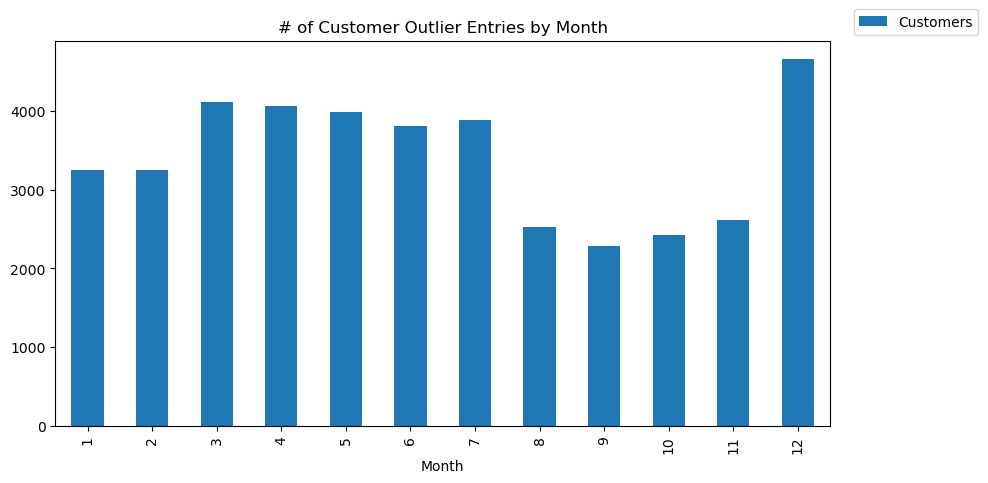

In [248]:
cust_outliers_by_month = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='Month', values='Customers', aggfunc='count')

cust_outliers_by_month.plot(y='Customers', kind='bar', figsize=(10,5), title="# of Customer Outlier Entries by Month")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

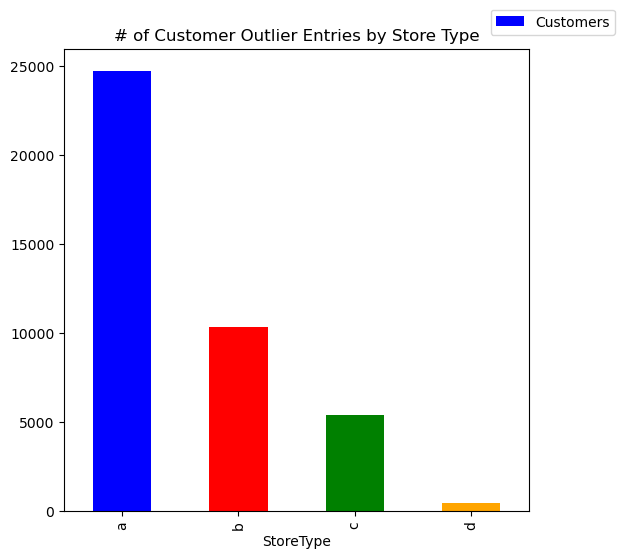

In [249]:
cust_outliers_by_stype = pd.pivot_table((sales_treated.loc[sales_treated[col] > upper_cust]), index='StoreType', values='Customers', aggfunc='count')

cust_outliers_by_stype.plot(y='Customers', kind='bar', figsize=(6,6), 
                             title="# of Customer Outlier Entries by Store Type", 
                             color=['blue','red','green','orange'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


December is our most represented month for Customer outliers, similar to our Sales outliers, but it's percentage of outliers is less than we saw with our Sales.

We also see store Type A with the strongest showing when we break down the outliers by store type. Much like the Sales outliers Type A stores represent a strong 60%+ of the outliers. Surprisingly, Type D stores represent a tiny 1.02% of these Customer outliers, where as they represented the second largest percentage of Sales outliers at 15.29%. Further investigation into the number of items bought (Sales) per transaction (Customer) may prove insightful.

Similar to our Sales outliers, we will also limit our Customer outliers to our calculated upper range, by imputing them to 1,454, so as to limit their influence but also indicate that they're meant to be high numbers.

# ANALYSIS

<h1><center>Total No. of Stores according to therir type</center></h1>

[Text(0.5, 1.0, 'Total No. of Stores according to therir type')]

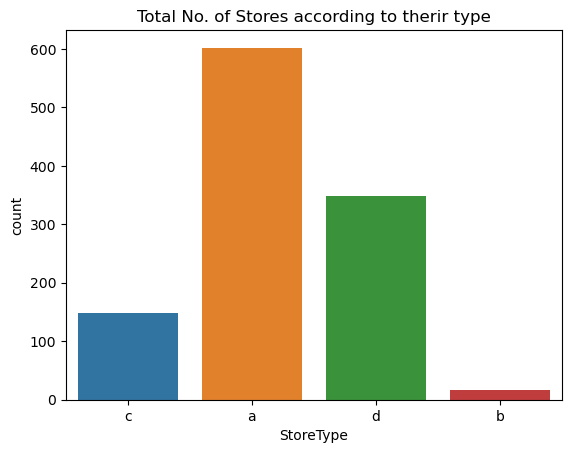

In [308]:
sns.countplot(data=stores_lookup,x='StoreType').set(title='Total No. of Stores according to therir type')

<h1><center>DayOFWeek</center></h1>

[Text(0.5, 1.0, 'DayOfWeek')]

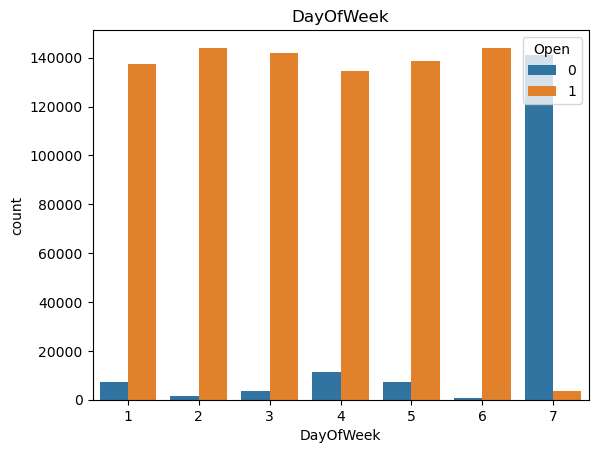

In [307]:
sns.countplot(data=sales_data, x="DayOfWeek",  hue="Open").set(title='DayOfWeek')

This clearly shows that most of the stores remain closed during Sundays. Some stores were closed in weekdays too, this might be due to State Holidays as stores are generally closed during State Holidays and opened during School Holidays.

 <h1><center>SALE OF EACH MONTH </center></h1>

[Text(0.5, 1.0, 'Sale of Each Month')]

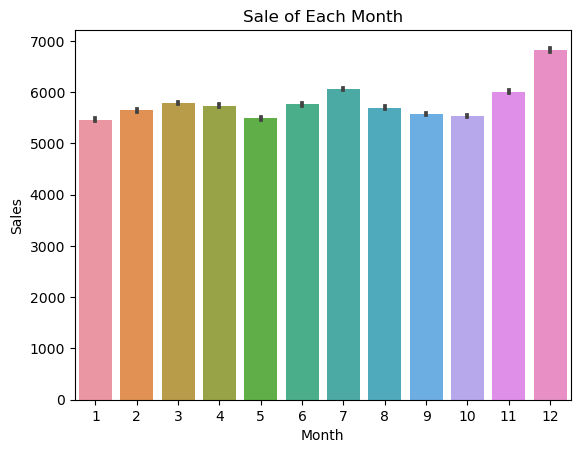

In [252]:
sns.barplot(data=sales_data, x="Month", y="Sales").set(title='Sale of Each Month')

#<h1><center>WEEKLY SALE ANALYSIS</center></h1> 

[Text(0.5, 1.0, 'Weekly Sale Analysis')]

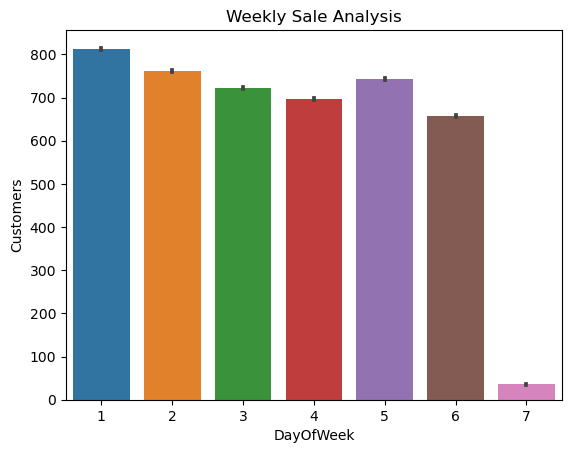

In [253]:
sns.barplot(data=sales_data, x="DayOfWeek", y="Customers").set(title= 'Weekly Sale Analysis')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

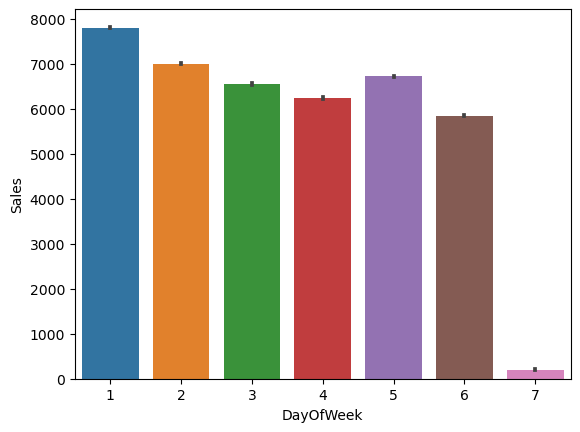

In [309]:
sns.barplot(data=sales_data, x="DayOfWeek", y="Sales")

Here we observe that Sales and Customers are both very less on Sundays as most of the stores are closed on Sunday.

Also, Sales on Monday is highest in whole week. This might be due to the fact that stores are closed on Sundays.

In [255]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 93.1+ MB


#<h1><center>PROMO vs SALE ANALYSIS </center></h1>

[Text(0.5, 1.0, 'Promo Vs Sale Analysis')]

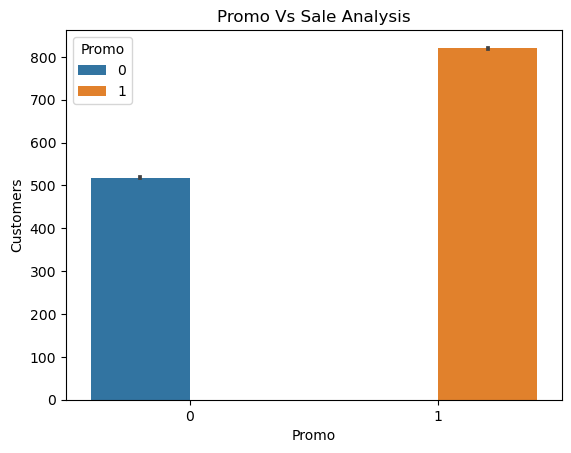

In [317]:
sns.barplot(data=sales_data, x="Promo", y="Customers", hue="Promo").set(title= 'Promo Vs Sale Analysis')

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

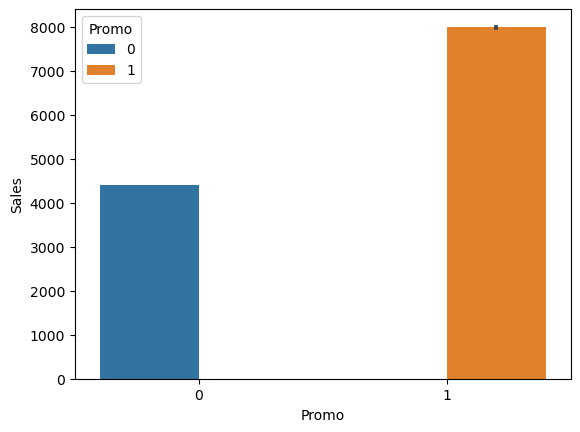

In [257]:
sns.barplot(data=sales_data, x="Promo", y="Sales", hue="Promo")

<AxesSubplot:xlabel='StoreType', ylabel='count'>

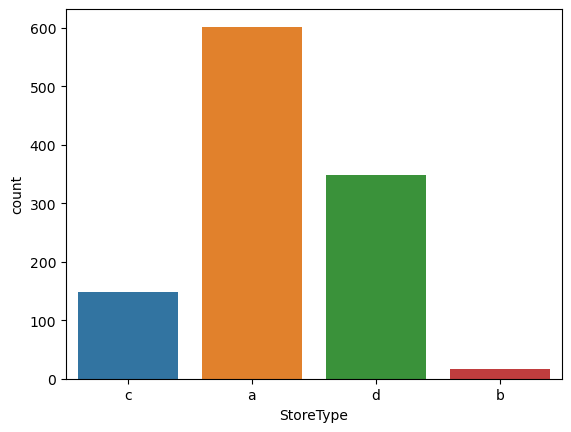

In [258]:
sns.countplot(data=stores_lookup,x='StoreType')

<AxesSubplot:xlabel='Assortment', ylabel='count'>

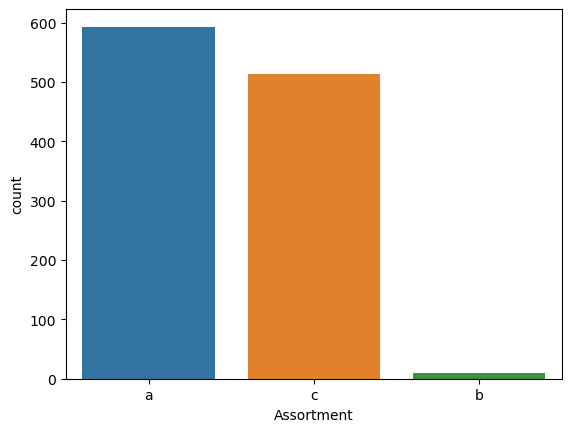

In [259]:
sns.countplot(data=stores_lookup,x='Assortment')


<AxesSubplot:xlabel='PromoInterval', ylabel='count'>

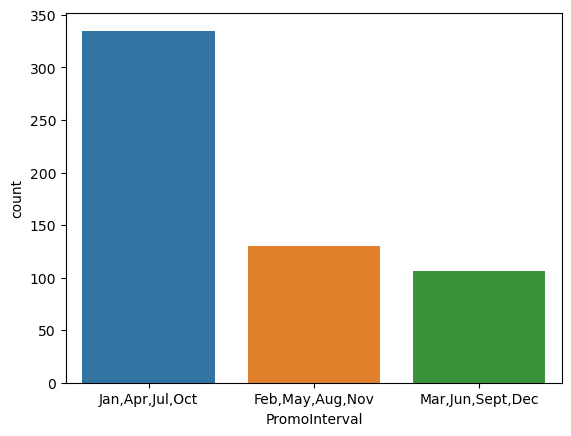

In [260]:
sns.countplot(data=stores_lookup,x='PromoInterval')
# the most interval promo is in Jan,Apr,jul,october the first month in every quadrimester of a year


sns.barplot(data=stores_lookup , x="Year", y="Sales", hue="Promo2")


<h1><center>COMPARISON BETWEEN PROMO vs NON PROMO SALE</center></h1>

YEARLY

[Text(0.5, 1.0, 'YEARLY')]

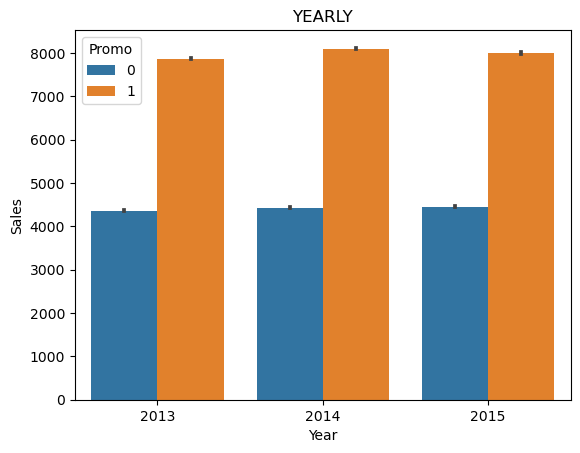

In [261]:
sns.barplot(data=sales_data, x="Year", y="Sales", hue="Promo").set(title= 'YEARLY')

MONTHLY

[Text(0.5, 1.0, 'MonthLY')]

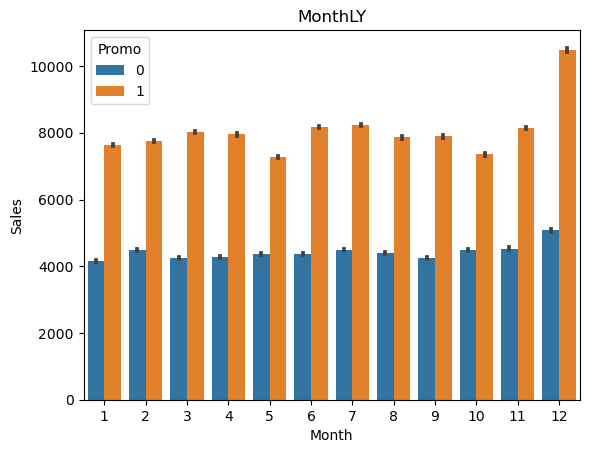

In [262]:
sns.barplot(data=sales_data, x="Month", y="Sales", hue="Promo").set(title= 'MonthLY')


<h1><center>EFFECT OF SCHOOL AND STATE HOLIDAYS ON SALE</center></h1>

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

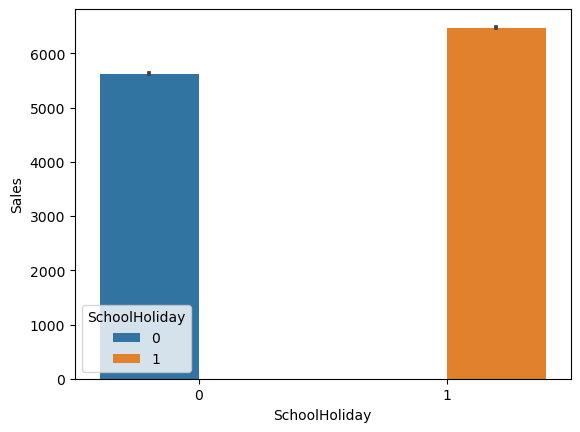

In [263]:
sns.barplot(data=sales_data, x="SchoolHoliday", y="Sales", hue="SchoolHoliday")

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

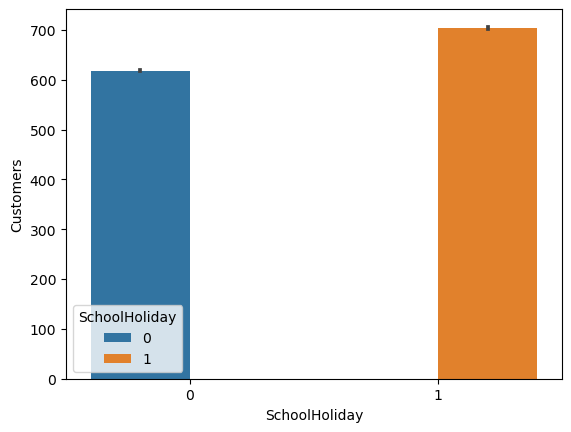

In [264]:
sns.barplot(data=sales_data, x="SchoolHoliday", y="Customers", hue="SchoolHoliday")

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

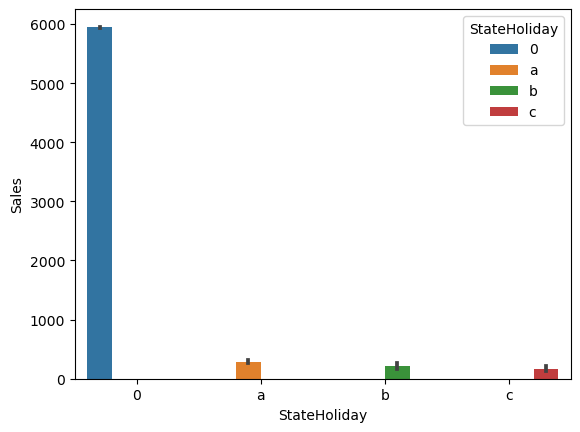

In [265]:
sns.barplot(data=sales_data, x="StateHoliday", y="Sales", hue="StateHoliday")

<AxesSubplot:xlabel='Year', ylabel='Sales'>

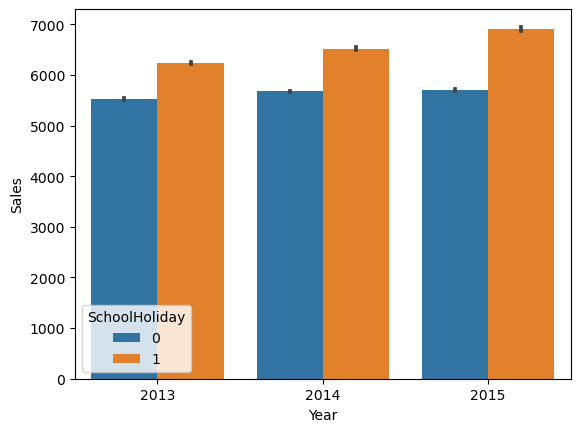

In [266]:
sns.barplot(data=sales_data, x="Year", y="Sales", hue="SchoolHoliday")

<AxesSubplot:xlabel='Year', ylabel='Sales'>

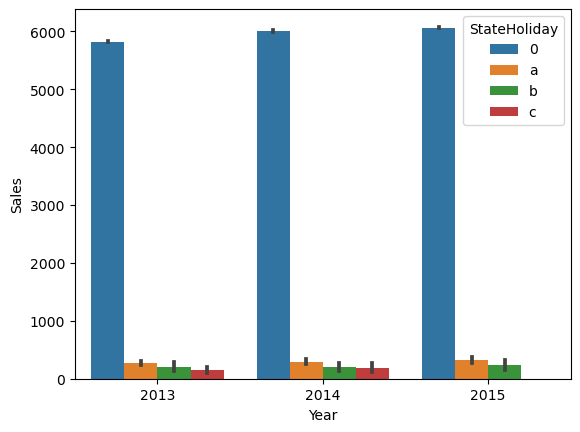

In [267]:
sns.barplot(data=sales_data, x="Year", y="Sales", hue="StateHoliday")

We can observe from the above plot that during school holidays numbers of customers and sales is higher than the normal days.

For state holidays numbers of customers and sale is highest when there is no holidays.This may be due to most of the store are closed on state holidays.

<h1><center>COMOETITION DISTANCE</center></h1>

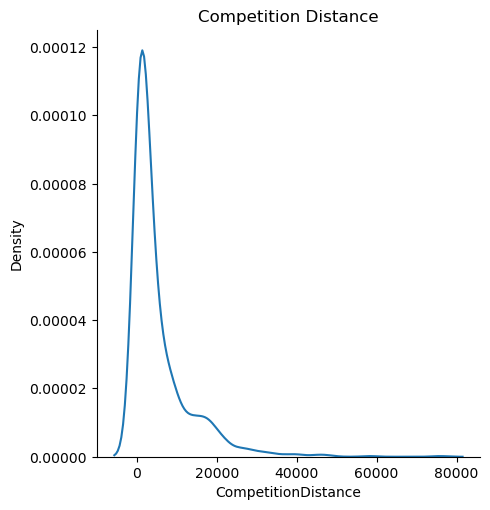

In [310]:
sns.displot(data=stores_lookup, x='CompetitionDistance',kind ="kde").set(title='Competition Distance')

<h1><center>COMPETION OPEN SINCE YEAR</center></h1>

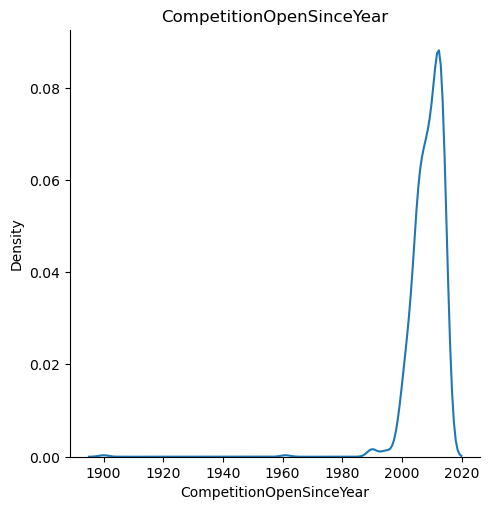

In [269]:
sns.displot(data=stores_lookup, x='CompetitionOpenSinceYear', kind="kde").set(title='CompetitionOpenSinceYear')

<h1><center>PROMO 2</center></h1>

[Text(0.5, 1.0, 'Promo2')]

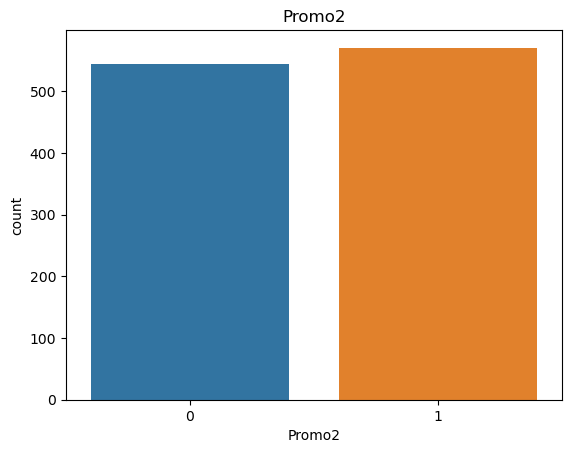

In [332]:
sns.countplot(data=stores_lookup, x='Promo2').set(title='Promo2')

We can clearly observe that the most of the store did not apply promo2 on their store approx 45%.

<h1><center>PROMO INTERVAL</center></h1>

[Text(0.5, 1.0, 'PromoInterval')]

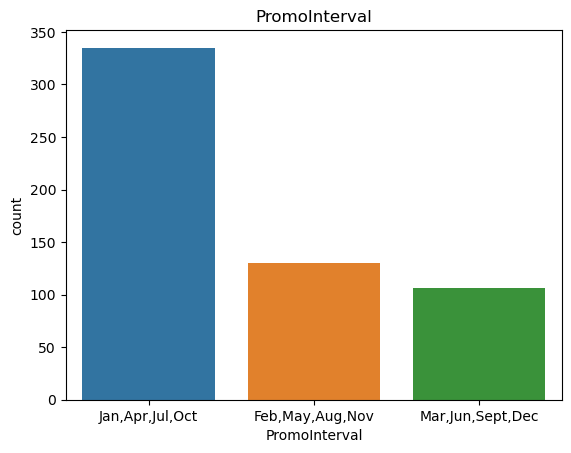

In [271]:
sns.countplot(data=stores_lookup, x='PromoInterval').set(title='PromoInterval')

# 6. MissinG Values

Next we'll take a look at missing values. We'll start by assessing how many we have and where.

In [272]:
import seaborn as sns
sales_treated.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,DayOfMonth,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,421085.000000,421085.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580,2013.831937,5.845738,15.835683,5457.979627,7.224879,2008.697747,0.498684,23.253426,2011.754019
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103,0.777260,3.323931,8.683456,7809.437311,3.210144,5.978048,0.499999,14.100569,1.660962
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,2014.000000,8.000000,23.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,2015.000000,12.000000,31.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [273]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
DayOfMonth                        0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64

In [274]:
(sales_treated.isna().sum() * 100 / sales_treated.shape[0]).round(2)   ## missing values as a % of all values in the column

Store                         0.00
DayOfWeek                     0.00
Date                          0.00
Sales                         0.00
Customers                     0.00
Promo                         0.00
StateHoliday                  0.00
SchoolHoliday                 0.00
Year                          0.00
Month                         0.00
DayOfMonth                    0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.26
CompetitionOpenSinceMonth    31.81
CompetitionOpenSinceYear     31.81
Promo2                        0.00
Promo2SinceWeek              50.13
Promo2SinceYear              50.13
PromoInterval                50.13
dtype: float64

While we see a rather high 50% missing values rate for Promo2SinceWeek and Promo2SinceYear we can check and see if these all just correspond to stores that aren't running Promo2, and hence would not be expected to have valid data for these columns.

In [275]:
print(sales_treated[sales_treated['Promo2'] == 0].shape[0])
print(sales_treated['Promo2SinceWeek'].isna().sum())
print(sales_treated['Promo2SinceYear'].isna().sum())

423307
423307
423307


As the number of entries with missing Promo2SinceWeek and Promo2SinceYear values corresponds with the number of entries where the store isn't participating in Promo2, we can rest assured that the lack of data here is appropriate

<--------------------------------------------------------------->

-----------------------------------------------------------------
The other area we see missing data is in relation to competition stores, mostly in the two columns relating when the nearest competitor store opened, and to much lesser extent in CompetitionDistance

The CompetitionDistance values may be used for analyzing how stores perform based on how close their competition is, and as such missing values could skew such analysis. 0 would be an inappropriate replacement for these null values as it would indicate that the competition stores are incredibly close. As such we'll look to replace these missing values with the mean CompetitionDistance based on the StoreType.

In [276]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
DayOfMonth                        0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                423307
dtype: int64

Next we will replace the null values in our PromoInterval column. As this column contains strings listing the months the Promo2 starts anew, we will replace the missing values with a string 'NA' for Not Applicable.

In [277]:
sales_treated.loc[sales_treated['PromoInterval'].isna(), 'PromoInterval'] = "NA"

In [278]:
sales_treated['PromoInterval'].value_counts()

NA                  423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

<AxesSubplot:xlabel='PromoInterval', ylabel='count'>

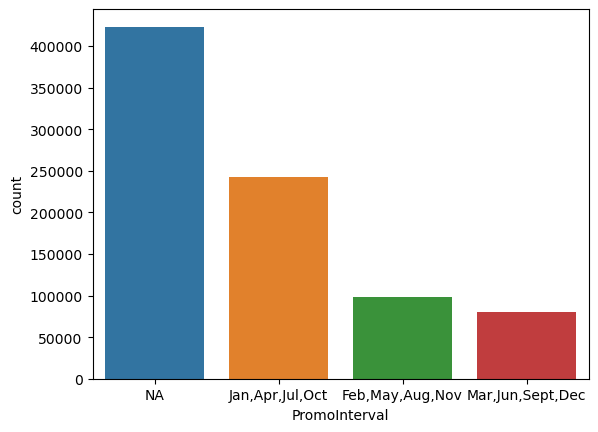

In [279]:
sns.countplot(data=sales_treated,x='PromoInterval')

For the missing values in 'CompetitionOpenSinceYear' & 'Promo2SinceYear' it would be inappropriate to replace them with zeros, as further calculations with the years in that column could lead to values suggesting a competition store has been open 2022 years. As such, we'll impute these missing values with the current year, so if calculations are done to find how long the nearest competition store has been open since these instances of no competition store nearby will return zero years.

In the same manner we will impute the missing values in 'CompetitionOpenSinceMonth' with the current month, and 'Promo2SinceWeek' with the current week.

Now we'll double check our count of missing values again to confirm our changes worked.

In [280]:
sales_treated.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
DayOfMonth                        0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
PromoInterval                     0
dtype: int64

# 7.                     AddinG an UpT Column

Based on our investigation of Sales and Costumers outliers, particularly how they're represented by different store types, I thought it would be worthwhile to add a calculated column to give us some insight into the relationship between Customers and Sales for each store and day.

In [281]:
(sales_treated['Customers'] >= sales_treated['Sales']).value_counts()

False    844338
True         54
dtype: int64

We can see that for almost all entries we have in our dataframe, the number of Sales at a given store is greater than the number of Customers. Suggesting that the Customers value is derived by how many transactions there are at a store, and the Sales value is indicative of how many individual items are sold. Thus we can calculate the average number of items sold for each transaction as Units Per Transaction (UPT).

First we'll quickly investigate the 54 rows where there aren't more Sales than Customers.



In [282]:
sales_treated[sales_treated['Customers'] >= sales_treated['Sales']]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,0,0,1,2015,5,15,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,0,0,0,2015,3,26,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,0,0,2015,2,5,a,a,180.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,0,0,2014,10,1,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,0,0,0,2014,9,22,a,a,2060.0,10.0,2008.0,0,NaN,NaN,NA
340348,227,4,2014-09-11,0,0,0,0,0,2014,9,11,a,a,2370.0,NaN,NaN,0,NaN,NaN,NA
340860,835,4,2014-09-11,0,0,0,0,0,2014,9,11,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,0,0,0,2014,9,10,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,0,1,2014,9,5,d,c,3760.0,2.0,2009.0,0,NaN,NaN,NA
346734,28,4,2014-09-04,0,0,1,0,0,2014,9,4,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


We can see the majority of these days are entries with both zero Sales and zero Customers recorded. This seems odd for a day that the store is open. A quick check of merged_sales, which still has the Open column, gives us the same results and assures us that the stores are indeed marked as open on these days.

In [283]:
merged_sales[(merged_sales['Customers'] >= merged_sales['Sales']) & merged_sales['Open'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,1,0,0,1,2015,...,15,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,1,0,0,0,2015,...,26,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,1,0,0,2015,...,5,a,a,180.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,1,0,0,2014,...,1,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,1,0,0,0,2014,...,22,a,a,2060.0,10.0,2008.0,0,NaN,NaN,NaN
340348,227,4,2014-09-11,0,0,1,0,0,0,2014,...,11,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN
340860,835,4,2014-09-11,0,0,1,0,0,0,2014,...,11,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,1,0,0,0,2014,...,10,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,1,0,1,2014,...,5,d,c,3760.0,2.0,2009.0,0,NaN,NaN,NaN
346734,28,4,2014-09-04,0,0,1,1,0,0,2014,...,4,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


I can only speculate as to why we have entries for stores that are open but aren't recording any sales, perhaps a stocktake day? Let's also look at the cases that aren't zero Sales and zero Customers.



In [284]:
sales_treated[sales_treated['Customers'] > sales_treated['Sales']]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
478649,1100,2,2014-04-29,0,3,1,0,0,2014,4,29,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
889932,948,4,2013-04-25,0,5,1,0,0,2013,4,25,b,b,1430.0,NaN,NaN,0,NaN,NaN,NA


I'm unsure of why we have two days with zero Sales and a small handful of Customers. As I have no explanation for these 2 days, nor the 52 other open days with zero Sales and Customers, I don't feel comfortable deleting them.

This does pose a small problem for calculating our average UPT, however. As such we will create our UPT column by dividing the day's Sales by the days Customers to find the average Units Per Transaction for each day and store. The resulting 52 null values will be imputed with a zero to reflect the zero Sales for those entries.

# 8.    RevieW of Summary Statistics Post Cleaning
   some of our summary statistics now that we've cleaned our data a bit. We can look at the summary statistics for sales to see them as they were before treating outliers and imputing for missing data, and compare them to the sales_treated summary statistics to see how they've changed.



In [290]:
merged_sales[['Sales', 'Customers', 'CompetitionDistance']].describe() ## BEFORE cleaning

,Sales,Customers,CompetitionDistance
count,1.017209e+06,1.017209e+06,1.014567e+06
mean,5.773819e+03,6.331459e+02,5.430086e+03
std,3.849926e+03,4.644117e+02,7.715324e+03
min,0.000000e+00,0.000000e+00,2.000000e+01
25%,3.727000e+03,4.050000e+02,7.100000e+02
50%,5.744000e+03,6.090000e+02,2.330000e+03
75%,7.856000e+03,8.370000e+02,6.890000e+03
max,4.155100e+04,7.388000e+03,7.586000e+04


In [291]:
sales_treated[['Sales', 'Customers', 'CompetitionDistance', 'UPT']].describe() ## AFTER cleaning

,Sales,Customers,CompetitionDistance,UPT
count,844392.000000,844392.000000,842206.000000,844392.000000
mean,6955.514291,762.728395,5457.979627,9.493034
std,3104.214680,401.227674,7809.437311,2.198689
min,0.000000,0.000000,20.000000,0.000000
25%,4859.000000,519.000000,710.000000,7.895316
50%,6369.000000,676.000000,2320.000000,9.249698
75%,8360.000000,893.000000,6890.000000,10.899631
max,41551.000000,7388.000000,75860.000000,64.957854


We can see that the cleaning has narrowed our standard deviation for Sales and Customers, as well as raising the mean after removing the entries for closed stores

# Exploratory INSIGHTS

Let's explore how stores perform in Sales by month, based on Assortment type. We know that Assortment type A offers a "basic" assortment of merchandise, Type B offers and "extra" assortment, and type C offers an "extended" assortment.

Because our data ranges from Jan. 1, 2013 - July 31, 2015, we will exclude the 2015 data for now so as we are only looking at a complete years' worth of numbers.

In [295]:
assortment_pivot_total_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), ## Excluding 2015 data
               index='Month', values='Sales', columns='Assortment', aggfunc=np.sum)
assortment_pivot_total_sales

Assortment,a,b,c
Month,,,
1,189940434,3783643,174160917
2,179926379,3770863,166761710
3,200909288,4272163,189018772
4,193658963,4318572,179998874
5,193536256,4822406,181745658
6,188331893,4605623,177811886
7,190836866,4423566,187476157
8,176785176,4189543,180816483
9,170120890,4209890,168239351


A quick look at Sales by volume of total sales shows that stores of Assortment types A and C have significantly more volume than type B stores. Type B stores stay fairly consistent in total Sales volume across all months, with minor upticks during mid-year and end year. Type A and C stores can be seen to follow very similar trends in terms of Sales volume.

A quick look at how many stores we have of each Assortment type will show us significantly less stores of Assortment type B, which accounts for the significantly lower volume of Sales.

In [296]:
pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Assortment', values='Store', aggfunc='count')

,Store
Assortment,
a,340968
b,6304
c,301088


Due to the vast differences in total Sales volume based on Assortment type, lets also look at the average number of Sales.

(Note: We could include our 2015 data since we're calculating the mean Sales now, but for the sake of consistency when comparing it with the total Sales we will continue to use the same 2013-2014 data.)

In [297]:
assortment_pivot_avg_sales = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='Month', values='Sales', columns='Assortment', aggfunc=np.mean)
assortment_pivot_avg_sales

Assortment,a,b,c
Month,,,
1,6196.673431,6993.794824,6600.254557
2,6322.968056,7727.178279,6797.721751
3,6649.762950,8168.571702,7224.383580
4,6654.718498,8210.212928,7150.473682
5,6740.135683,8642.304659,7284.103162
6,6574.456922,8528.931481,7121.876317
7,6622.600847,8393.863378,7195.124232
8,6243.296228,7949.796964,7071.430700
9,6243.884974,8254.686275,6846.233865


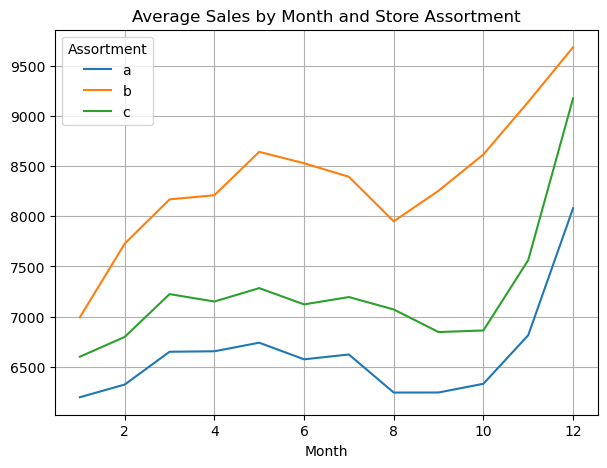

In [298]:
assortment_pivot_avg_sales.plot(kind='line', title='Average Sales by Month and Store Assortment', figsize=(7,5), grid=True)
plt.show()


Look at average Sales by store Assortment type we can see that stores of type B actually perform quite well when compared to types A and C, despite there being significantly less type B stores! Types A and C continue to follow very similar trends for Sales, but Type C stores consistently outperform type A stores.

Let's also take a look at how our UPT metric compares across stores of different Assortment types.

(Note: Because we included a UPT metric for our table that still has our extremely high Sales outliers, we will plot that too, to compare

In [300]:
pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]), index='StoreType', values='Store', aggfunc='count')

,Store
StoreType,
a,351476
b,11959
c,87079
d,197846


Next let's look at average Sales per month, broken down by StoreType.

To understand a bit more about our different Store Types, let's also quickly see how they compare in relation to the Competition Distance.

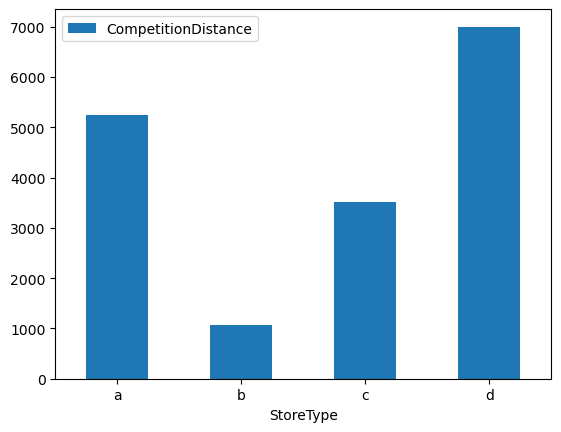

In [337]:
stype_pivot_avg_compdist = pd.pivot_table((sales_treated[sales_treated['Year'] < 2015]),
                                         index='StoreType', values='CompetitionDistance', aggfunc=np.mean)

stype_pivot_avg_compdist.plot(kind='bar', rot=0)
plt.show()

Stores of Store Type B are significantly closer to their nearest competitor store, on average. This might suggest the Type B stores are most often in dense urban shopping areas. Perhaps with many other stores available in closer proximity, customers are less likely but multiple items at the store when they can more easily purchase additional items at other nearby stores. Let's see if there's any correlation between CompetitionDistance and UPT.

# Conclusion

The popularity of store type A and the strong correlation between sales and the number of customers highlight the importance of attracting and retaining customers. Promotions have proven to be an effective way to increase sales and customer traffic, and store openings during school holidays can help to capitalize on increased demand during those periods. Additionally, it is essential to keep an eye on competition, as the majority of stores face competition within a 5km radius. The impact of Promo2 on sales is not significant, and it might not be worth the investment for all stores to implement it. These insights, along with the use of feature engineering techniques to create more informative datasets, can help Rossmann make data-driven decisions to optimize its inventory, promotional strategies, and overall business operations to drive higher sales and revenue.